# Setting up environment

In [335]:
import numpy as np
import pandas as pd
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

# Getting data using NSEpy

In [336]:
tcs = get_history(symbol="TCS", start=date(2015,1,1), end=date(2016,12,31))
infy = get_history(symbol="INFY", start=date(2015,1,1), end=date(2016,12,31))
nifty = get_history(symbol="NIFTY IT", start=date(2015,1,1), end=date(2016,12,31),index=True)

# Fetching needed data

In [337]:
tcs_close = pd.DataFrame(tcs.Close)
infy_close = pd.DataFrame(infy.Close)
nifty_close = pd.DataFrame(nifty.Close)

# Function to calclulate MA for 4,16...52 weeks 

In [339]:
weeks = [28,112,196,280,364]
MA_tcs = {}
MA_infy = {}
MA_nifty = {}
for i in range(5):
    MA_tcs[i] = movingaverage(tcs_close.Close,weeks[i])
    MA_infy[i] = movingaverage(infy_close.Close,weeks[i])
    MA_nifty[i] = movingaverage(nifty_close.Close,weeks[i])
    
MA_tcs
MA_infy
MA_nifty    
   

{0: array([  400.56071429,   806.70714286,  1208.44107143,  1599.86607143,
         1989.72321429,  2383.22857143,  2790.35892857,  3202.63214286,
         3613.44642857,  4028.24285714,  4445.02321429,  4861.4375    ,
         5277.25      ,  5694.92857143,  6116.84642857,  6540.09107143,
         6964.56071429,  7382.18392857,  7803.95357143,  8226.24464286,
         8648.55714286,  9075.12678571,  9502.40892857,  9928.79821429,
        10363.26785714, 10801.40892857, 11238.88392857, 11673.27142857,
        11709.975     , 11745.68571429, 11789.12857143, 11843.675     ,
        11904.9875    , 11965.90357143, 12007.77142857, 12043.04464286,
        12081.02321429, 12117.41785714, 12145.58392857, 12177.56071429,
        12213.88392857, 12248.48035714, 12285.70178571, 12317.12142857,
        12344.99107143, 12371.01964286, 12392.2875    , 12411.15178571,
        12432.54107143, 12445.69107143, 12461.94642857, 12477.8125    ,
        12481.775     , 12482.03392857, 12486.1125    , 12489

In [338]:
def movingaverage(values, window):
    weights = np.repeat(1.0,window)/window
    MA = np.convolve(values,weights)
    return MA

# Funtion to calculate MA with unequal time series due to stock market holidays

In [340]:
def rollingwindow(values,w):
    SMA = values.rolling(w).mean().shift()
    return SMA
    

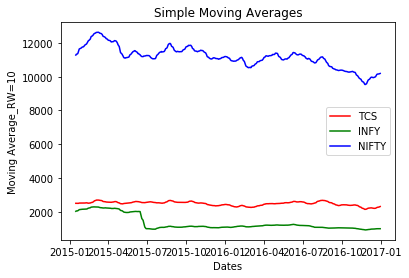

In [344]:

tcs_close["MA_10"] = rollingwindow(tcs_close.Close,10)
infy_close["MA_10"] = rollingwindow(infy_close.Close,10)
nifty_close["MA_10"] = rollingwindow(nifty_close.Close,10) 
plt.plot(tcs_close["MA_10"], color = "red", label = 'TCS')
plt.plot(infy_close["MA_10"], color = "green", label = 'INFY')
plt.plot(nifty_close["MA_10"], color = "blue", label = 'NIFTY')
plt.xlabel('Dates')
plt.ylabel('Moving Average_RW=10')
plt.title('Simple Moving Averages')
plt.legend()
plt.show()